# Introduction to Intel(r) Extensions for Scikit-learn*

![Assets/speedupKNN.png](Assets/speedupKNN.png)

<a id='Back_to_Sections'></a>

## Sections
- [Introducing Intel® oneAPI AI Analytics Toolkit](#Intel-oneAPI-AI-Analytics-Toolkit)
- [Sklearnex Optimized Functions](#Sklearnex-Optimized-Functions)
- [Patching Strategies with Intel(r) Extensions for scikit-learn](#Patching-Strategies-with-Intel(r)-Extensions-for-scikit-learn)
- [Plot KNN speed up using patch](#Plot-KNN-speed-up-using-patch)

### Learning Objectives:

By the end of this lession you will be able to:

- Describe the basics of oneAPI AI Kit components, and where the Intel(R) Extensions for scikit-learn* fits in the broader package
- Describe where to download and how to install the oneAPI AI Kit
- Describe the advantages of one specific component of oneAPI AI Kit, Intel(R) Extensions for scikit-learn*, invoked via the sklearnex library
- Apply the patch and unpatch functions with varying granularities including python scripts and also within Jupyter cells: from whole file applications to more surgical patches applied to a single algorithm.
- Apply patch methodology to speed up KNN on CovType dataset
- Enumerate sklearn algorithms which have been optimized


## Intel oneAPI AI Analytics Toolkit

![Assets/AIAnalyticsToolkitOverview.jpg.jpg](Assets/AIAnalyticsToolkitOverview.jpg)

- [Back to Sections](#Back_to_Sections)

The Intel® oneAPI AI Analytics Toolkit gives data scientists, AI developers, and researchers who are familiar Python* tools and frameworks the ability to accelerate end-to-end data science and analytics pipelines on Intel® architectures. The components are built using oneAPI libraries for low-level compute optimizations. This toolkit maximizes performance from preprocessing through machine learning, and provides interoperability for efficient model development.

The value: Using this toolkit, you can:

 - Deliver high-performance deep learning (DL) training on Intel® XPUs and integrate fast inference into your AI development workflow with Intel-optimized DL frameworks: TensorFlow* and PyTorch*, pretrained models, and low-precision tools. 
 - Achieve drop-in acceleration for data preprocessing and machine learning workflows with compute-intensive Python* packages: Modin*, scikit-learn*, and XGBoost* optimized for Intel.
 - Gain direct access to Intel analytics and AI optimizations to ensure that your software works together seamlessly.
 - This module will focus exclusively on the value aforded via the Intel(r) Extensions for scikit-learn*
 
* download and install the onaAPI AI toolkit
  * Download via Conda, Pip, Docker and more
  *  [Information about acquiring oneAPI AI Toolkit](https://intel.github.io/scikit-learn-intelex/installation.html)


# Desribe the value 

### of Intel(r) Extensions for scikit-learn*

See this description at anaconda.com

[Scikit-learn Speed-up with Intel and Anaconda](https://www.anaconda.com/blog/scikit-learn-speed-up-with-intel-and-anaconda)

**Summarizing:**

Anaconda and Intel are collaborating to build key open-source data science packages optimized for Intel hardware to make machine learning fast and scalable for practitioners everywhere. 

![Assets/scklearnSpeedupTraining.png](Assets/scklearnSpeedupTraining.png)
![Assets/sklearnSpeedupInference.png](Assets/sklearnSpeedupInference.png)

How would you characterize the average gain using Intel(r) Extensions for scikit-learn* based on what you observe in this chart?

# Sklearnex Optimized Functions

Intel has created an better performing and functionally equivalent library contained patched versions of 32 popular scikit-learn* algorithms. To access these optimized alogirthms which are drop in replaceable with their stock counterparts, you need to:

* download and install the onaAPI AI toolkit
  *  [Information about acquiring oneAPI AI Toolkit](https://intel.github.io/scikit-learn-intelex/installation.html)
* import the library 
  * from sklearnex import patch_sklearn
  * call the patch_sklearn() function
* THEN import the deisred sklearn library

These are the [currently optimized functions optimized with Intel(R) Extensions for scikit learn](https://intel.github.io/scikit-learn-intelex/algorithms.html). Different algorithms have been optimized for Intel CPU and Intel GPU. This allows a develoeprs to check which functions are currently optimized. Some functions are simply aliases to others in that list, to see the 23 optimized "unique" functions - open the data/sklearnex_gallery.csv or run the follow cell.

- [Back to Sections](#Back_to_Sections)

Below you can interact with a Pandas Dataframe containing more information oabout the algorithms optimized using Intel Extensions for scikit-learn*

In [2]:
import pandas as pd
sklearnex_gallery = pd.read_csv('data/sklearnex_gallery.csv')
sklearnex_gallery

,Acronym,Name,What is it used for,Advantages,Disadvantages
0,config_context,config_context,"We will ignore this one for the course, but it...",NaN,NaN
1,dbscan,Density-based spatial clustering of applicatio...,Density-based spatial clustering of applicatio...,does not require one to specify the number of ...,scklearnex must only use ‘euclidean’ or ‘minko...
2,distances,Distances,AKA Pairwise Distnace: Part of the sklearn.met...,Used to find similarity of vectors - such as s...,Intel Extensions for scikit-learn:\nWith metri...
3,elasticnet,ElasticNet,Linear regression with combined L1 and L2 prio...,The elastic net method performs variable selec...,Intel sklearnex: All parameters except sample_...
4,fin_check,aka assert_all_finite,Throw a ValueError if X contains NaN or infinity.,Can be very valuable when doing data cleaning ...,Only dense data is supported
5,get_config,get_config,Retrieve current values for configuration set ...,NaN,NaN
6,kmeans,K-Means clustering.,KMeans algorithm clusters data by trying to se...,Relatively simple to implement. Scales to larg...,intel sklearnex: All parameters except precomp...
7,kneighborsclassifier,K Nearest Neighbors Classifier,Classifier: Find the K-neighbors of a point. R...,K-NN is pretty intuitive and simple: \nK-NN al...,Intel sklearex: ‘euclidean’ or ‘minkowski’ wi...
8,kneighborsregressor,K Nearest Neighbors Regressor,Regressor: Find the K-neighbors of a point. Re...,K-NN is pretty intuitive and simple: \nK-NN al...,Intel sklearex: ‘euclidean’ or ‘minkowski’ wi...
9,knn_classifier,k nearest neighbors classifier aka KNN classifier,Classifier implementing the k-nearest neighbor...,Advantages of KNN\nNo Training Period: KNN is ...,optimal choice of the value is highly data-dep...


Below you can filter the dataframe to see details about sklearnex library (aka Intel Extensions to scikit-learn*)

- familiarize yourself with a handful of algorithms, explore details aboput 'What is it used for', 'Advantages', 'Disadvantages'
 

In [3]:
def print_gallery_details(acroynm, column):
    print(sklearnex_gallery[sklearnex_gallery['Acronym'] == acroynm][column].tolist()[0])

details = ['What is it used for', 'Advantages', 'Disadvantages']
print_gallery_details('kneighborsclassifier', 'Advantages')

K-NN is pretty intuitive and simple: 
K-NN algorithm is very simple to understand and equally easy to implement. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.    
K-NN has no assumptions: 
K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. 
Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented which is not the case with K-NN.    
No Training Step: K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor.    
It constantly evolves: Given it’s an instance-based learning; k-NN is a memory-based approach. 
The classifier immediately adapts as we collect new training data. 
It allows the algorithm to respond quickly to changes in the input during real-time use.    
Very easy to implement for multi-c

In [4]:
# return list of optimzed functions
# this method of finding name info can be confusing as there are aliases to multiple fuctions
from sklearnex import get_patch_names, get_patch_map
sorted(get_patch_names())   #get_patch_map() for more details

['config_context',
 'dbscan',
 'distances',
 'elasticnet',
 'fin_check',
 'get_config',
 'kmeans',
 'kneighborsclassifier',
 'kneighborsregressor',
 'knn_classifier',
 'knn_regressor',
 'lasso',
 'linear',
 'log_reg',
 'logistic',
 'logisticregression',
 'nearest_neighbors',
 'nearestneighbors',
 'nusvc',
 'nusvr',
 'pca',
 'random_forest_classifier',
 'random_forest_regressor',
 'randomforestregressor',
 'randomrorestclassifier',
 'ridge',
 'roc_auc_score',
 'set_config',
 'svc',
 'svr',
 'train_test_split',
 'tsne']

# Patching Strategies with Intel(r) Extensions for scikit-learn

There are blunt/coarse methods t patch entire python scripts from the command line as well as finer granularity methods ising the patch_sklearn() down to almost surgical granularity methods of specifying which functions you wish to patch or unpatch


- [Back to Sections](#Back_to_Sections)

### patch an entire python script

Without editing the code of a scikit-learn application by using the following command line flag:

- python -m sklearnex my_application.py


### to patch a Jupyter notebook cell

The order of steps is important here:
* import the sklearnex library
* patch_sklearn()
* import any of the sklearn libraries you wish to use - **AFTER the call to patch_sklearn()** for example:
  * from sklearnex.neighbors import NearestNeighbors, PCA, Kmeans


### to UNPATCH sklearn to restore the stock behavior do the following:

The process is the same as for patching:
- unpatch_sklearn()
- next, **Re-import scikit-learn algorithms after the unpatch**
- from sklearn.cluster import PCA

### You can also specify which algorithms to patch explicitly

Patching only one algorithm:

- from sklearnex import patch_sklearn
- patch_sklearn("SVC")

### To patch several algorithms explicitly

- from sklearnex import patch_sklearn

- patch_sklearn(["SVC", "DBSCAN"])

### to UNPATCH algorithms explicitly, try one of these methods:

- unpatch_sklearn("KMeans") 

- unpatch_sklearn(["KMeans","SVC"]) 

## FAQ: What should I do if a patched function is SLOWER than the stock version?

#### Unpatch it!

The ability to patch and unpatch at different granularities ensures that your code shoudl perform no slower than stock, but with potentially large upside performance opportunities. unpatch a single function that is slower or a list - you have complete control!


- [Back to Sections](#Back_to_Sections)


# The bench function

Below we create a test harness to test specific comparisons of algorith/parameter choice with specific synthetic data generation choices

For measurements, we made a function, "bench",  in which data for each allgorithm is generated, an estiamtor for the algorithms is creaed, the the aggregated training and prediction times are computed.

This is not an examaple of how to code but rather a test harness to showcase different functions and their speedups using the patch strategy.

We define a bench function that will pair one algorithms with a synthesized dataset, to give you a sense of how fast these allgorithms can be when applied to some datasets - Not all datasets will have the same speedups but these are likley typical for the size, shape, and complexity of the generated data


In [6]:
from tqdm import tqdm  # progress bar
import time #so we can time the action
def bench(cases):
    elapsed_fit = {}  # dictionary to track the time elapsed for the fit method
    elapsed_predict = {}  # dictionary to track the time elapsed for the predict/transform method 
    # the parmeters for this algorithms and for generating the data will be in the next cell
    for name, case in tqdm(cases.items()):
        algorithm = case['algorithm']
        estimator = algorithm['estimator'](**algorithm['params'])
        data = case['data']
        x, y = data['generator'](**data['params'])
        
        # Timing of fit and predict    
        start = time.time()
        estimator.fit(x, y)
        fit_time = time.time() - start
        start = time.time()
        if hasattr(estimator, 'predict'):
            estimator.predict(x)
        if hasattr(estimator, 'transform'):
            estimator.transform(x)            
        predict_time = time.time() - start
        
        elapsed_fit[name] = fit_time
        elapsed_predict[name] = predict_time
    return elapsed_fit, elapsed_predict

# Benchmarks

We create a function to return a dictionary with parameters for both the alogirthm to use as well as how the data will be generated.

Here we pair a given algorithm/parameter choice to a given synthetic randomly created data choice

This function **defines** the agorithm/dataset pair

You can retrun later to experiment with other values.

In [9]:
def get_cases():
    return {
    'SVC with Linear Kernel': {
        "algorithm": {
            'estimator': sklearn.svm.SVC,
            'params': {
                'C': 1.0,
                'kernel': 'linear',
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 20000,
                'n_features': 30,
                'n_classes': 3,
                'n_informative': 3,
                'random_state': 43,
            }
        }
    },
    'SVC with RBF Kernel': {
        "algorithm": {
            'estimator': sklearn.svm.SVC,
            'params': {
                'C': 1.0,
                'kernel': 'rbf',
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 25000,
                'n_features': 30,
                'n_classes': 5,
                'n_informative': 4,
                'random_state': 43,
            }
        }
    },
    'Logistic Regression': {
        "algorithm": {
            'estimator': sklearn.linear_model.LogisticRegression,
            'params': {
                'n_jobs': -1,
                'random_state': 43,
                'max_iter': 300
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 1000000,
                'n_features': 40,
                'n_classes': 10,
                'n_informative': 5,
                'random_state': 43,
            }
        }
    },
    'KNN Classifier': {
        "algorithm": {
            'estimator': sklearn.neighbors.KNeighborsClassifier,
            'params': {
                'n_jobs': -1,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 35000,
                'n_features': 30,
                'n_classes': 3,
                'n_informative': 3,
                'random_state': 43,
            }
        }
    },
    'KNN Regression': {
        "algorithm": {
            'estimator': sklearn.neighbors.KNeighborsRegressor,
            'params': {
                'n_neighbors': 10,
                'n_jobs': -1,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_regression,
            'params':
            {
                'n_samples': 35000,
                'n_features': 30,
                'random_state': 43,
            }
        }
    },
    'Linear Regression': {
        "algorithm": {
            'estimator': sklearn.linear_model.LinearRegression,
            'params': {
                'n_jobs': -1,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_regression,
            'params':
            {
                'n_samples': 3000000,
                'n_features': 100,
                'n_targets': 60,
                'random_state': 43,
            }
        }
    },     
    'Ridge Regression': {
        "algorithm": {
            'estimator': sklearn.linear_model.Ridge,
            'params': {
                'alpha':1.0
            }
        },
        "data": {
            'generator': sklearn.datasets.make_classification,
            'params':
            {
                'n_samples': 30000000,
                'n_features': 30,
                'n_classes': 3,
                'n_informative': 3,
                'random_state': 43,
            }
        }
    }, 
    'PCA': {
            "algorithm": {
            'estimator': sklearn.decomposition.PCA,
            'params': {
                'n_components': 25,
                'svd_solver': 'full',
                'random_state': 43,
            }
        },
        "data": {
            'generator': sklearn.datasets.make_blobs,
            'params':
            {
#                 'n_samples': 3000000,
#                 'n_features': 100,
                'n_samples': 3000000,
                'n_features': 30,                
                'centers': 20,
                'random_state': 43,
            }
        }
    },   
}

# Feel the burn 
###  **UN**patch_sklearn to get a **feel** for how **long** this can take with **stock sklearn**

Intel(R) Extension for Scikit-learn* disabled (https://github.com/intel/scikit-learn-intelex)

In [12]:
from sklearnex import patch_sklearn, unpatch_sklearn
unpatch_sklearn()  # this will set parameters such that the stock version of sklearn will be called
import sklearn.svm, sklearn.datasets, sklearn.neighbors, sklearn.linear_model, sklearn.decomposition
cases = get_cases()  #case the algorithm/dataset pairs
sklearn_fit, sklearn_predict = bench(cases)  # call the bench function to captures the elapsed time dictionaries


100%|██████████| 8/8 [04:38<00:00, 34.85s/it]


In [13]:
print('Result of scikit-learn stock: ', sklearn_fit)
print('Result of scikit-learn stock: ', sklearn_predict)

Result of scikit-learn stock:  {'SVC with Linear Kernel': 45.601115465164185, 'SVC with RBF Kernel': 22.54472327232361, 'Logistic Regression': 28.47379422187805, 'KNN Classifier': 0.0029892921447753906, 'KNN Regression': 0.0008220672607421875, 'Linear Regression': 12.841152906417847, 'Ridge Regression': 7.142337322235107, 'PCA': 4.742365598678589}
Result of scikit-learn stock:  {'SVC with Linear Kernel': 8.581126928329468, 'SVC with RBF Kernel': 23.514570951461792, 'Logistic Regression': 0.13567352294921875, 'KNN Classifier': 23.965619564056396, 'KNN Regression': 25.04629611968994, 'Linear Regression': 1.0007588863372803, 'Ridge Regression': 0.8876280784606934, 'PCA': 0.586078405380249}


# patch_sklearn

Now feel the acceleration when pathcing is applied

NOTICE: **No code changes**: We have not changed any code here inside the benchmark. We simply patch it prior to importing our desired sklearn components!

[More detail for Intel(r) Extension for Scikit-learn* enabled](https://github.com/intel/scikit-learn-intelex)

In [18]:
from sklearnex import patch_sklearn, unpatch_sklearn
# insert code ( a single line) to patch sklearn here:

#### insert code here ###########
from sklearnex import patch_sklearn
patch_sklearn()
#################################

import sklearn.svm, sklearn.datasets, sklearn.neighbors, sklearn.linear_model, sklearn.decomposition
cases = get_cases()
sklearnex_fit, sklearnex_predict = bench(cases)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
100%|██████████| 8/8 [01:21<00:00, 10.20s/it]


# Analysis of result

Next we plot the timing results

## Plot results for the fit function

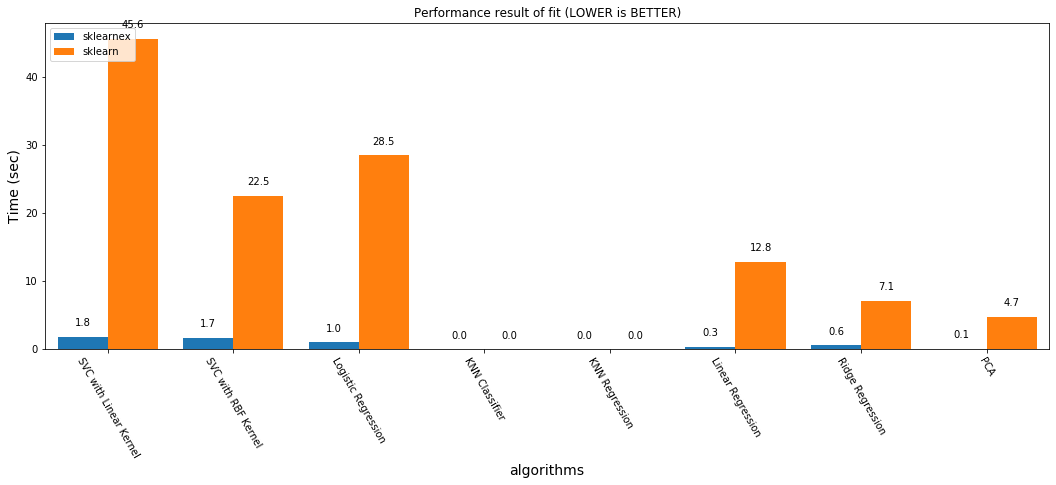

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

result = { name_sk: [time_ex, time_sk] for (name_sk, time_sk), 
          (name_ex, time_ex) in zip(sklearn_fit.items(), sklearnex_fit.items())}
result['Library'] = ['sklearnex', 'sklearn']
df_fit = pd.DataFrame(data=result).melt('Library', var_name='Algorithms', value_name='Time')

fig = plt.figure(figsize=(18, 6))
fig.patch.set_alpha(1)

plt.subplot(1, 1, 1)

barplot = sns.barplot(x='Algorithms', y='Time', hue='Library',
                      data=df_fit, errwidth = 2,
                      capsize = 0.05, saturation = 8,)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                     ha = 'center', va = 'center')

plt.legend(loc=2)
plt.ylabel("Time (sec)", size=14)
plt.xlabel("algorithms", size=14)
plt.title("Performance result of fit (LOWER is BETTER)")
plt.xticks(rotation = -60) # Rotates X-Axis Ticks by 60-degrees
plt.show()

## Plot results for the transform/predict function

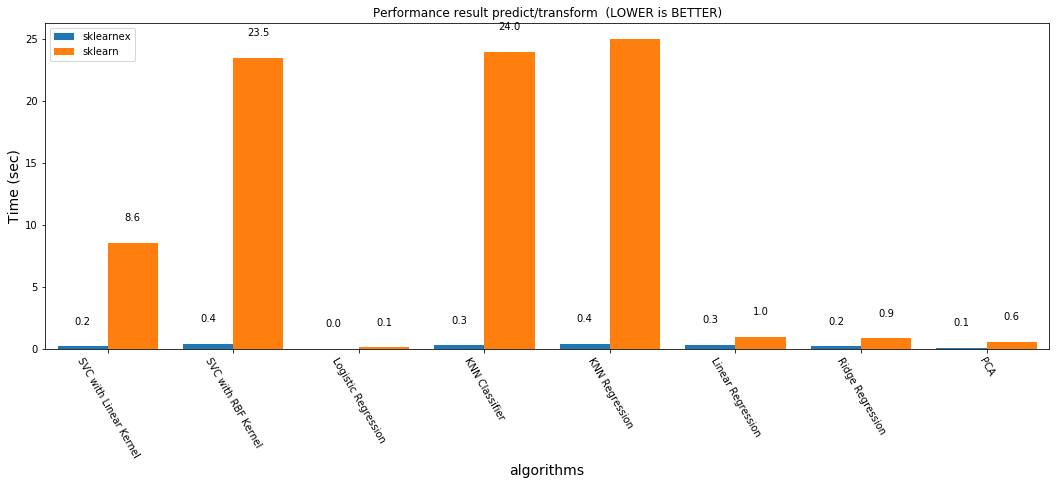

In [28]:
result = { name_sk: [time_ex, time_sk] for (name_sk, time_sk), 
          (name_ex, time_ex) in zip(sklearn_predict.items(), sklearnex_predict.items())}
result['Library'] = ['sklearnex', 'sklearn']
df_predict = pd.DataFrame(data=result).melt('Library', var_name='Algorithms', value_name='Time')

fig = plt.figure(figsize=(18, 6))
fig.patch.set_alpha(1)

plt.subplot(1, 1, 1)

barplot = sns.barplot(x='Algorithms', y='Time', hue='Library',
                      data=df_predict, errwidth = 2,
                      capsize = 0.05, saturation = 8,)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                     ha = 'center', va = 'center')

plt.legend(loc=2)
plt.ylabel("Time (sec)", size=14)
plt.xlabel("algorithms", size=14)
plt.title("Performance result predict/transform  (LOWER is BETTER)")
plt.xticks(rotation = -60) # Rotates X-Axis Ticks by 60-degrees
plt.show()

## Plot results for the aggreagte of fit + predict functions

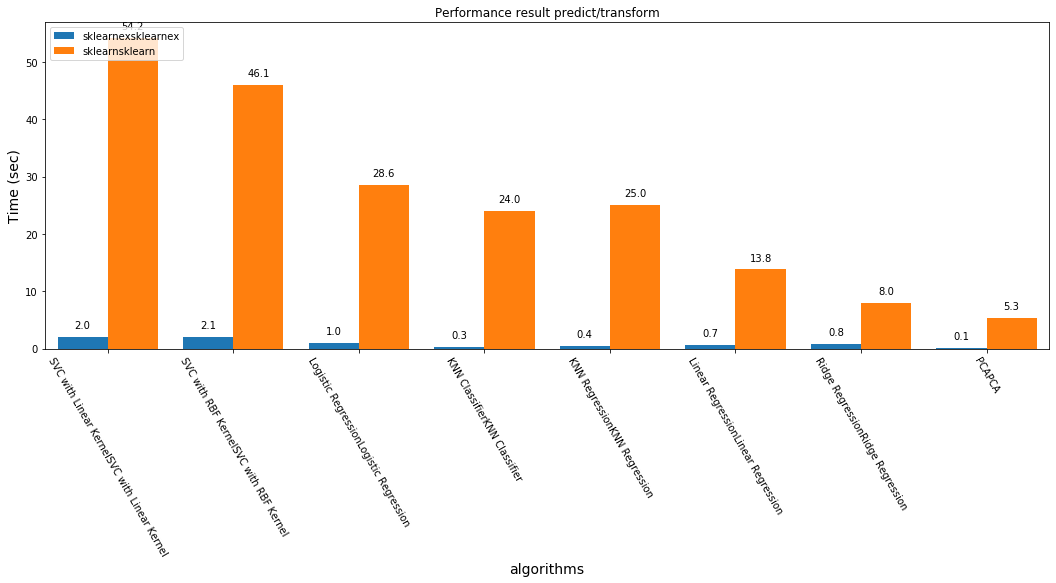

In [27]:
result = { name_sk: [time_ex, time_sk] for (name_sk, time_sk), 
          (name_ex, time_ex) in zip(sklearn_fit.items(), sklearnex_fit.items())}
result['Library'] = ['sklearnex', 'sklearn']
df_fit = pd.DataFrame(data=result).melt('Library', var_name='Algorithms', value_name='Time')

result = { name_sk: [time_ex, time_sk] for (name_sk, time_sk), 
          (name_ex, time_ex) in zip(sklearn_predict.items(), sklearnex_predict.items())}
result['Library'] = ['sklearnex', 'sklearn']
df_predict = pd.DataFrame(data=result).melt('Library', var_name='Algorithms', value_name='Time')

fig = plt.figure(figsize=(18, 6))
fig.patch.set_alpha(1)

plt.subplot(1, 1, 1)

barplot = sns.barplot(x='Algorithms', y='Time', hue='Library',
                      data= df_fit + df_predict, errwidth = 2,
                      capsize = 0.05, saturation = 8,)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                     ha = 'center', va = 'center')

plt.legend(loc=2)
plt.ylabel("Time (sec)", size=14)
plt.xlabel("algorithms", size=14)
plt.title("Performance result predict/transform")
plt.xticks(rotation = -60) # Rotates X-Axis Ticks by 60-degrees

plt.show()

All algorithms were greatly accelerated, instead of minutes, they worked in just a few seconds! Acceleration reaches up to 100 times - imagine how simple and fast it is now to compute your kernels with scikit-learn applications using Intel(R) Extension!

Go back and experiment with a handful of dataset parameters (one dataset at a time and dont make the datasizes too radically different right away - you could run out of memory or the algorithm can take forever. As you gain familiarity with how the algorithm/dataset pair behaves with changes in dataset parameters you can then gage how large to make the next change - based on your patience to wait for the stock result

- n_samples
- nfeatures
- nclasses
- n_informative

Another suggestion: Add Logistic regression to the list using similar parameters to SVC

# Conclusions
With Intel(R) Extension for Scikit-learn* patching you can:

Use your scikit-learn code for training and inference without modification.
Train and predict scikit-learn models up to 100 times faster.
Get the same quality of predictions as other tested frameworks.
Intel(R) Extension for Scikit-learn* adds more accelerated scikit-learn algorithms to each release, learn what algorithms are optimized [here](https://intel.github.io/scikit-learn-intelex/).

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.